# Test technique

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [39]:
df = pd.read_csv('data.csv')
df['Experience'] = df['Experience'].str.replace(',', '.').astype('float')
df.head(5)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


## Question 1

In [40]:
print(f"Le nombre d'observation est de {len(df)}")

Le nombre d'observation est de 9582


Il y a plusieurs valeurs manquantes :

In [41]:
df[df.isna().sum(1) > 0]

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux
28,Voya Financial,Lead data scientist,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Master,NaN,Marseille
104,Capgemini,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Bachelor,NaN,Bordeaux
161,JLL,Data engineer,C/C++/Java/Python/Linux,Master,NaN,Toulouse
346,Jacobs,NaN,Python/Spark/GNU/Linux,No diploma,2.5,Paris
...,...,...,...,...,...,...
9490,Pearson,NaN,R/Python/Spark/Pycharm/SAS/SQL,Master,4.0,Marseille
9496,United States Soccer Federation,Data scientist,Excel/VBA/R,Master,NaN,Marseille
9498,Delta Air Lines,Data architecte,Java/AWS/Elasticsearch/Kibana,No diploma,NaN,Lyon
9510,General Electric,Data architecte,Hadoop/Hive/Vertica/Tableau,Master,NaN,Toulon


## Question 2

Imputation des valeurs manquantes par la médiane pour les Data scientists, par la moyenne pour les Data engineer

In [42]:
df.loc[(df.Metier == 'Data scientist') & (df.Experience.isna()), 'Experience'] = df.loc[(df.Metier == 'Data scientist') & ~(df.Experience.isna()), 'Experience'].median()
df.loc[(df.Metier == 'Data engineer') & (df.Experience.isna()), 'Experience'] = df.loc[(df.Metier == 'Data engineer') & ~(df.Experience.isna()), 'Experience'].mean()

## Question 3

Expérience en fonction du métier

In [48]:
df.groupby('Metier').agg(mean_exp = ('Experience', 'mean'))

,mean_exp
Metier,
Data architecte,3.000476
Data engineer,2.984959
Data scientist,2.241268
Lead data scientist,3.965261


## Question 4

Visualisation de l'expérience en fonction du métier

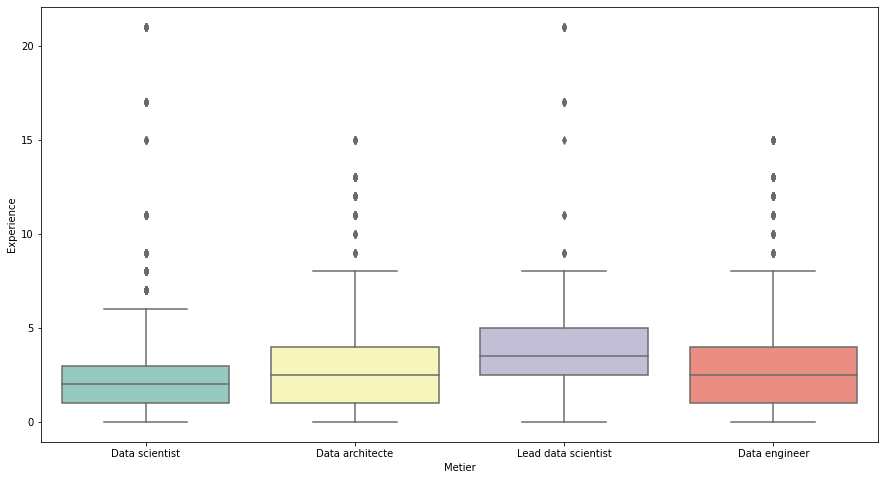

In [51]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Metier", y="Experience",
                 data=df, palette="Set3")

## Question 5

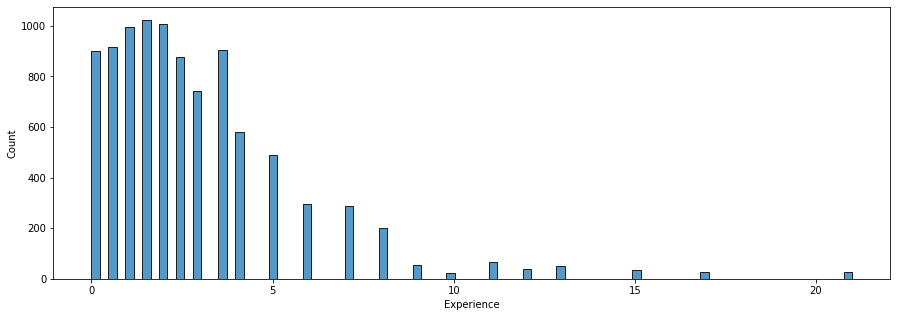

In [55]:
plt.figure(figsize=(15,8))
ax = sns.histplot(x="Experience", data=df, palette="Set3")

In [60]:
df['Exp_label'] = pd.cut(df['Experience'], bins=[0, 3, 7, 10, 20], include_lowest=True, labels=['Débutant', 'Confirmé', 'Avancé', 'Expert'])

## Question 6

In [87]:
top5_tech = (pd.Series(np.hstack(df['Technologies'].str.split('/')))
    .value_counts()
    .reset_index()
    .rename(columns={0: 'count'})
    .head(5))

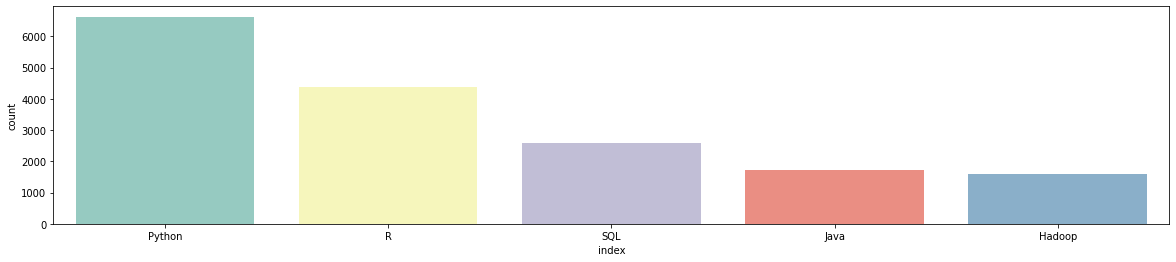

In [90]:
plt.figure(figsize=(20,4))
ax = sns.barplot(x='index', y="count", data=top5_tech, palette="Set3")